<a href="https://www.kaggle.com/code/houssemaminetouihri/polynomial-regression-outperforms-other-models?scriptVersionId=106508622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-fishs-weight/Train.csv
/kaggle/input/predict-the-fishs-weight/Test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [3]:
Train = pd.read_csv("../input/predict-the-fishs-weight/Train.csv")   
Test = pd.read_csv("../input/predict-the-fishs-weight/Test.csv")


In [4]:
Train.head()


,ID,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
0,hAmkM80XrB,Dorade,30.9,33.5,38.6,15.6330,5.1338,610.0
1,j5tRKxc3P4,Éperlan,9.3,9.8,10.8,1.7388,1.0476,6.7
2,w2M3CLts3v,Brochet,48.3,51.7,55.1,8.9262,6.1712,950.0
3,9XCIhKuBo3,Gardon,17.5,18.8,21.2,5.5756,2.9044,78.0
4,xb0n1Eyv8Y,Perche,19.0,21.0,22.5,5.6925,3.5550,110.0


In [5]:
Test.head()


,ID,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur
0,5gLYcjsz9z,Perche,23.5,25.6,27.0,6.5610,4.2390
1,j0rBCrMwYa,Dorade,31.8,35.0,40.6,15.4686,6.1306
2,GI72jxWh7u,Perche,25.0,26.5,28.0,7.1680,4.1440
3,YJNyDH3z1V,Brochet,30.0,32.3,34.8,5.5680,3.3756
4,y98GtegfKY,Perche,20.0,22.0,23.5,5.6400,3.5250


In [6]:
Train.shape


(123, 8)

In [7]:
duplicate_df = Train[Train.duplicated()] #checking  duplicate_rows
print("Number of Duplicate rows : ",duplicate_df.shape)
duplicate_df1 = Test[Test.duplicated()] #checking  duplicate_rows
print("Number of Duplicate rows : ",duplicate_df.shape)


Number of Duplicate rows :  (0, 8)
Number of Duplicate rows :  (0, 8)


In [8]:
total = Train.isnull().sum().sort_values(ascending=False)
percent = (Train.isnull().sum()/Train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LongueurDia,2,0.01626
LongueurVer,1,0.00813
Hauteur,1,0.00813
Largeur,1,0.00813
ID,0,0.00000
Espèce,0,0.00000
LongueurCro,0,0.00000
Poids,0,0.00000


In [9]:
total1 = Test.isnull().sum().sort_values(ascending=False)
percent1 = (Test.isnull().sum()/Test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data



,Total,Percent
LongueurDia,2,0.01626
LongueurVer,1,0.00813
Hauteur,1,0.00813
Largeur,1,0.00813
ID,0,0.00000
Espèce,0,0.00000
LongueurCro,0,0.00000
Poids,0,0.00000


<AxesSubplot:xlabel='LongueurDia', ylabel='Density'>

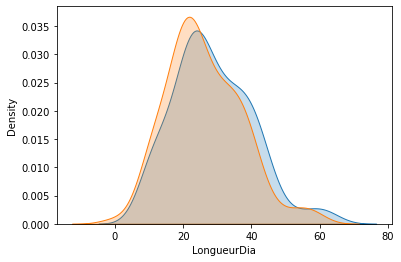

In [10]:
sns.kdeplot(data=Train['LongueurDia'], shade=True)
sns.kdeplot(data=Train['LongueurVer'], shade=True)


<AxesSubplot:xlabel='Hauteur', ylabel='Density'>

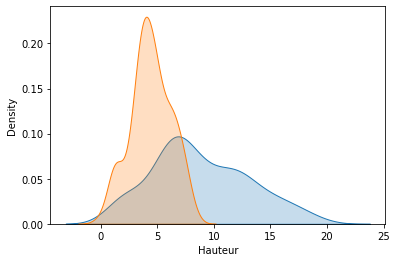

In [11]:
sns.kdeplot(data=Train['Hauteur'], shade=True)
sns.kdeplot(data=Train['Largeur'], shade=True)


<AxesSubplot:xlabel='Hauteur', ylabel='Density'>

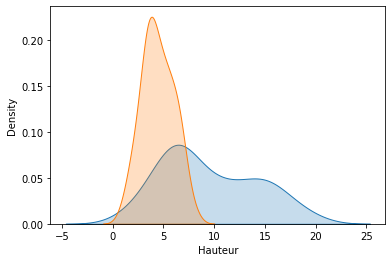

In [12]:
sns.kdeplot(data=Test['Hauteur'], shade=True)
sns.kdeplot(data=Test['Largeur'], shade=True)


In [13]:
Train['LongueurDia'] = Train['LongueurDia'].fillna (Train['LongueurDia'].median())#skewed data
Train['LongueurVer'] = Train['LongueurVer'].fillna (Train['LongueurVer'].median())
Train['Hauteur'] = Train['Hauteur'].fillna (Train['Hauteur'].median())#symetric data
Train['Largeur'] = Train['Largeur'].fillna (Train['Largeur'].mean())
Test['LongueurDia'] = Test['LongueurDia'].fillna (Test['LongueurDia'].median())#skewed data
Test['LongueurVer'] = Test['LongueurVer'].fillna (Test['LongueurVer'].median())
Test['Hauteur'] = Test['Hauteur'].fillna (Test['Hauteur'].median())
Test['Largeur'] = Test['Largeur'].fillna (Test['Largeur'].mean())


In [14]:
total1 = Test.isnull().sum().sort_values(ascending=False)
percent1 = (Test.isnull().sum()/Test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1


,Total,Percent
ID,0,0.0
Espèce,0,0.0
LongueurVer,0,0.0
LongueurDia,0,0.0
LongueurCro,0,0.0
Hauteur,0,0.0
Largeur,0,0.0


<AxesSubplot:xlabel='LongueurCro'>

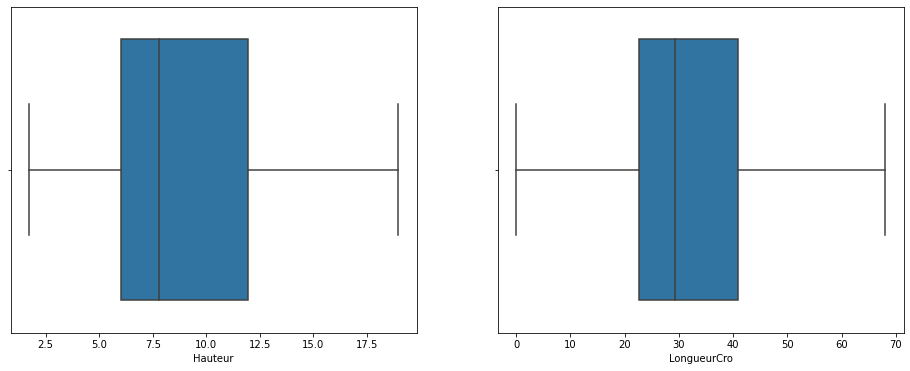

In [15]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x=Train["Hauteur"])
plt.subplot(122)
sns.boxplot(x=Train["LongueurCro"])
#--> No outliers


<AxesSubplot:xlabel='LongueurVer'>

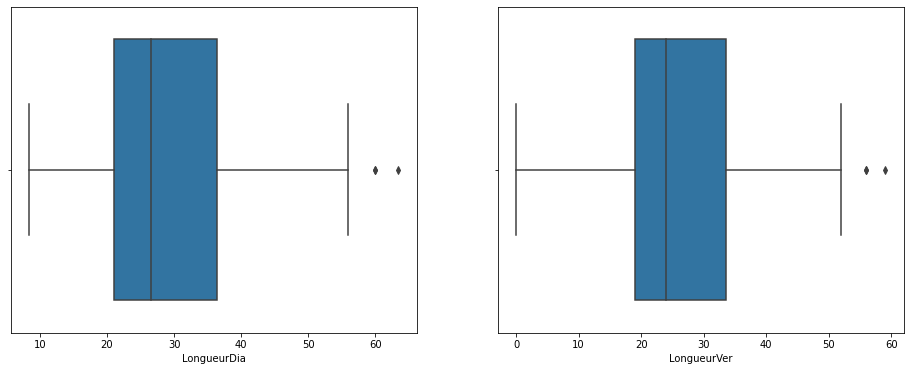

In [16]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x=Train["LongueurDia"])
plt.subplot(122)
sns.boxplot(x=Train["LongueurVer"])

<AxesSubplot:xlabel='Poids'>

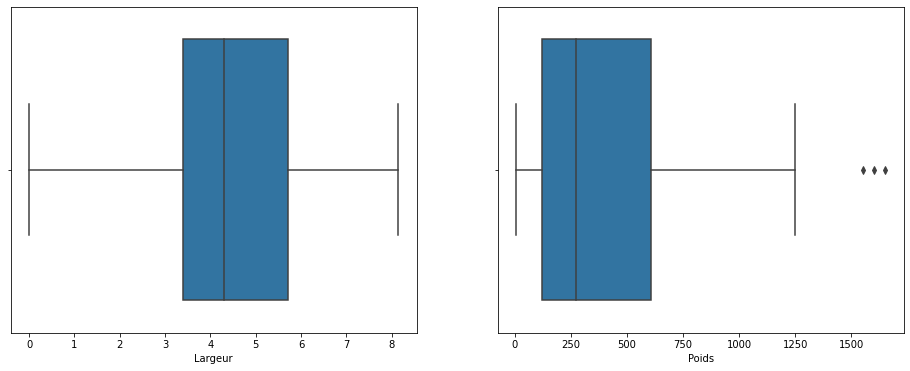

In [17]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x=Train["Largeur"])
plt.subplot(122)
sns.boxplot(x=Train["Poids"])



In [18]:
#eliminating the outliers
Q1 = Train.quantile(0.25)
Q3 = Train.quantile(0.75) 
IQR = Q3 - Q1
print(IQR)
Train.shape


LongueurVer     14.6000
LongueurDia     15.4500
LongueurCro     18.3000
Hauteur          5.8991
Largeur          2.3127
Poids          485.0000
dtype: float64


(123, 8)

In [19]:
Train = Train[~((Train<(Q1-1.5*IQR))|(Train > (Q3+1.5*IQR))).any(axis=1)]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='LongueurVer'>

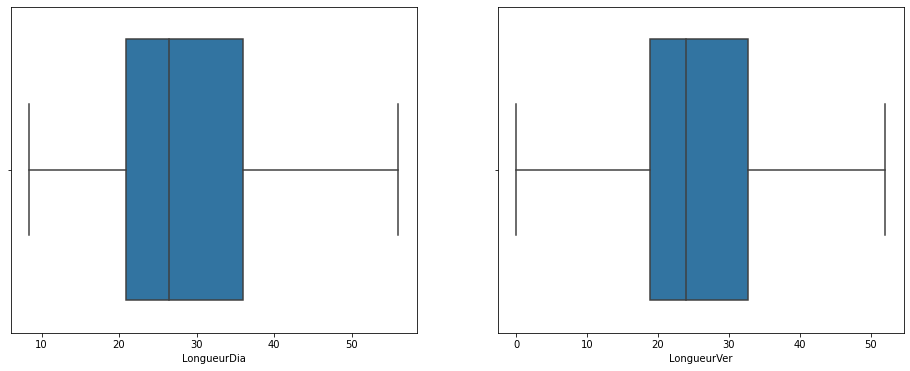

In [20]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(x=Train["LongueurDia"])
plt.subplot(122)
sns.boxplot(x=Train["LongueurVer"])

#### EDA

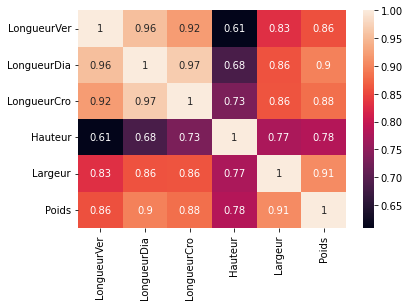

In [21]:
#visualizing
sns.heatmap(Train.corr(),annot=True);


In [22]:
Train1=Train.copy()
Test1=Test.copy()
Train1=Train1.drop(['LongueurVer'],axis=1)
#this feature is correlated with Diagonal length and has same meaning
Test1=Test1.drop(['LongueurVer'],axis=1) 
Train1

,ID,Espèce,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
0,hAmkM80XrB,Dorade,33.5,38.6,15.6330,5.133800,610.0
1,j5tRKxc3P4,Éperlan,9.8,10.8,1.7388,1.047600,6.7
2,w2M3CLts3v,Brochet,51.7,55.1,8.9262,6.171200,950.0
3,9XCIhKuBo3,Gardon,18.8,21.2,5.5756,2.904400,78.0
4,xb0n1Eyv8Y,Perche,21.0,22.5,5.6925,3.555000,110.0
...,...,...,...,...,...,...,...
118,DaWAKlwFdC,Perche,34.5,36.5,10.2565,6.387500,556.0
119,GmMvgJvsUW,Dorade,33.5,38.6,15.6330,5.133800,570.0
120,fZfIDdVfi2,Éperlan,9.8,0.0,1.7388,4.392384,5.7
121,bRvoqtt3Ly,Brochet,26.5,55.1,8.9262,6.171200,400.0


<AxesSubplot:xlabel='Espèce', ylabel='Poids'>

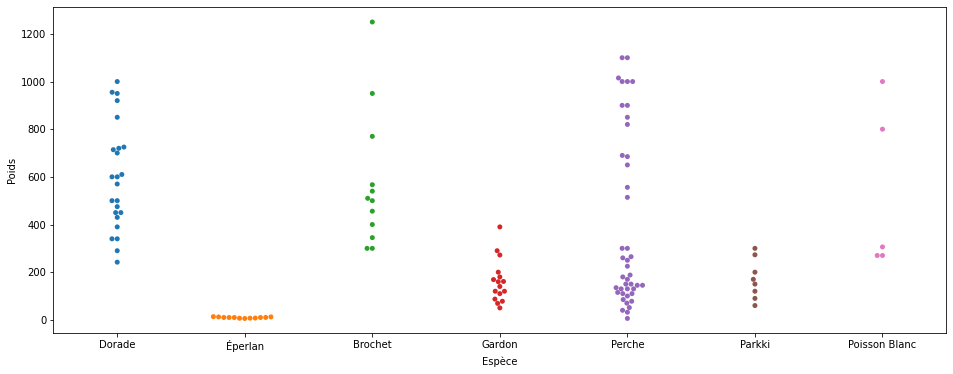

In [23]:
#explaining data by visualizing
plt.figure(figsize=(16, 6))

sns.swarmplot(x=Train['Espèce'],y=Train['Poids'])

<AxesSubplot:xlabel='Espèce', ylabel='Hauteur'>

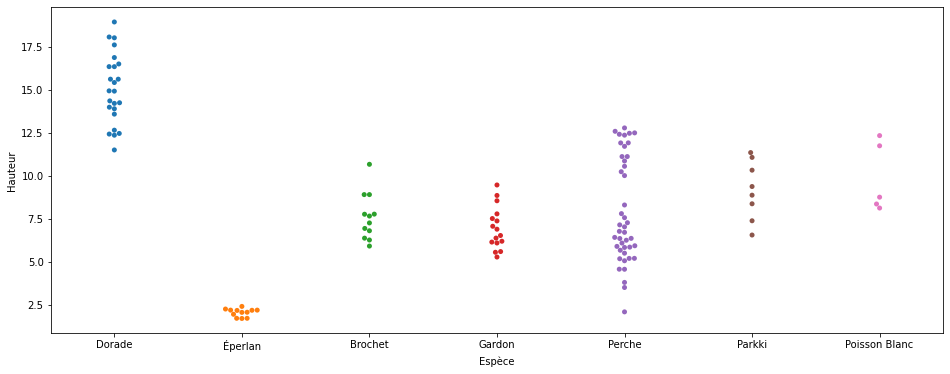

In [24]:
#explaining data by visualizing
plt.figure(figsize=(16, 6))

sns.swarmplot(x=Train['Espèce'],y=Train['Hauteur'])


<AxesSubplot:xlabel='Espèce', ylabel='Largeur'>

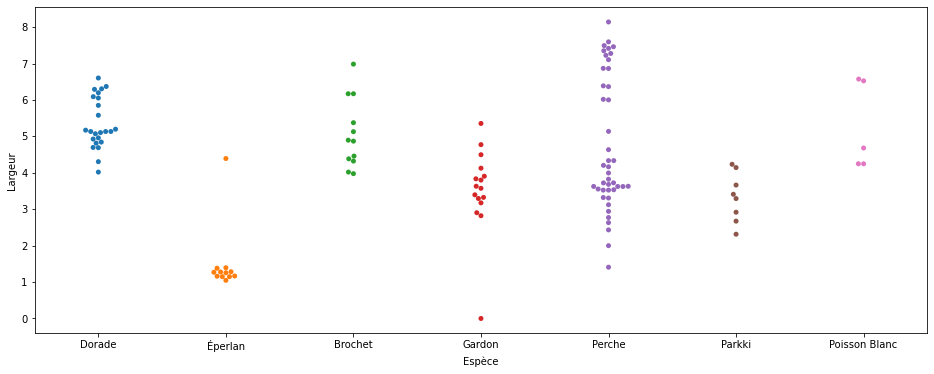

In [25]:
#explaining data by visualizing
plt.figure(figsize=(16, 6))
sns.swarmplot(x=Train['Espèce'],y=Train['Largeur'])

In [26]:
Train_ohe=pd.get_dummies(Train1,columns=['Espèce'])


In [27]:
Test1_ohe=pd.get_dummies(Test1,columns=['Espèce'])

In [28]:
Train_ohe=Train_ohe.drop(['ID','Poids'],axis=1)

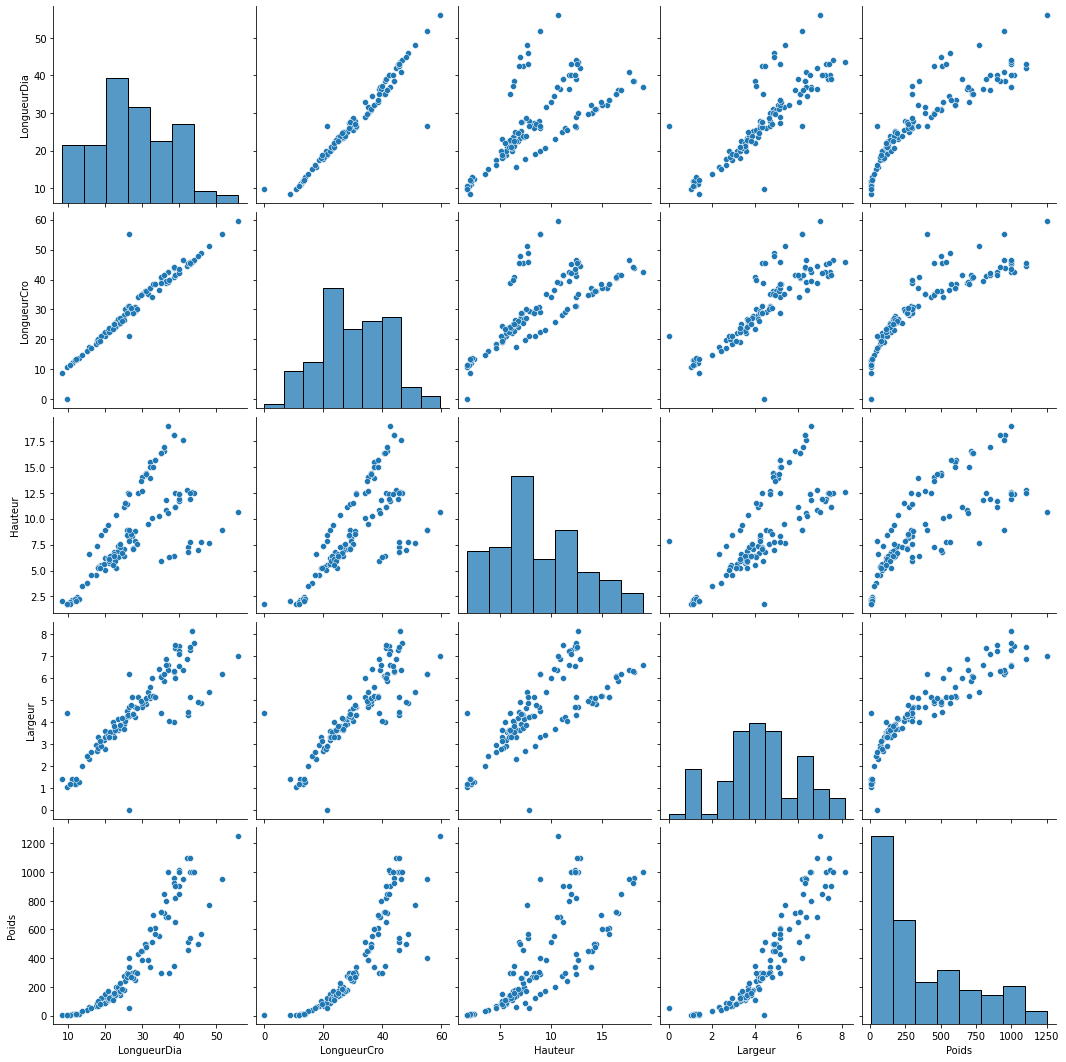

In [29]:
sns.pairplot(Train1, height= 3) #to see if i can choose linear regression

In [30]:

Test1_ohe=Test1_ohe.drop(['ID'],axis=1)

In [31]:
X = Train_ohe.iloc[:,:]
y=Train1['Poids']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
cv=KFold(5,random_state=0,shuffle=True)


In [32]:
X_train

,LongueurDia,LongueurCro,Hauteur,Largeur,Espèce_Brochet,Espèce_Dorade,Espèce_Gardon,Espèce_Parkki,Espèce_Perche,Espèce_Poisson Blanc,Espèce_Éperlan
31,26.0,29.0,11.3680,4.2340,0,0,0,1,0,0,0
55,22.5,25.0,6.5500,3.3250,0,0,1,0,0,0,0
121,26.5,55.1,8.9262,6.1712,1,0,0,0,0,0,0
9,26.0,29.2,8.8768,4.4968,0,0,1,0,0,0,0
34,30.7,36.2,14.2266,4.9594,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,27.5,28.9,7.1672,4.3350,0,0,0,0,1,0,0
14,22.0,23.5,5.8750,3.5250,0,0,0,0,1,0,0
94,28.0,30.8,8.7780,4.6816,0,0,0,0,0,1,0
52,23.5,26.8,7.3968,4.1272,0,0,1,0,0,0,0


# Modelling

#### Linear regression

I'll be taking consideration of a comment of @VinceVence creating a function that extracts the metrics and storing it in a dictionary

In [33]:
def extract_error_cross(model,x):
    
    scores=cross_val_score(model,x,y, cv=cv,scoring="neg_mean_squared_error")
    L=np.sqrt(-scores)
    return np.mean(L)

    
L1=list() #the list where i will put the Root Mean Squarred Error(by Cross Validation) of different models
L2=list() #it contains the Root Mean Squarred Error(by test_train_split)

i think i did the root mean squarred error like that because there is no predefined attribut for that 

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
#print(np.sqrt(mean_squared_error(y_test, y_pred)))
L2.append(np.sqrt(mean_squared_error(y_test, y_pred)))

L1.append(extract_error_cross(model,X)) # will be used in the dataframe at the bottom



#old version
#scores=cross_val_score(model,X,y, cv=cv,scoring="neg_mean_squared_error")
#L=np.sqrt(-scores)
#print(L)
#print(np.mean(L))

                    


In [35]:
# Trying polynomial regression 
X0=X.copy()



In [36]:
for i in ['LongueurDia','LongueurCro','Hauteur','Largeur']:
    x_0 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(np.array(X0[i].array).reshape((-1,1))) 
    x_0=pd.Series(x_0[:,1],index=X0.index)
    X0[i]=x_0
X_train0, X_test0, y_train0, y_test0 = train_test_split( X0, y, test_size=0.3, random_state=42)
    


In [37]:
model.fit(X_train0, y_train0)
y_pred0=model.predict(X_test0)
print(np.sqrt(mean_squared_error(y_test0, y_pred0)))


L1.append(extract_error_cross(model,X0))
L2.append(np.sqrt(mean_squared_error(y_test0, y_pred0)))

54.498435234907646


In [38]:
for i in ['LongueurDia','LongueurCro','Hauteur','Largeur']:
    x_0 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(np.array(X0[i].array).reshape((-1,1))) 
    x_0=pd.Series(x_0[:,1],index=X0.index)
    X0[i]=x_0
X_train0, X_test0, y_train0, y_test0 = train_test_split( X0, y, test_size=0.3, random_state=42)
    

In [39]:
model.fit(X_train0, y_train0)
y_pred0=model.predict(X_test0)
#print(np.sqrt(mean_squared_error(y_test0, y_pred0)))


L1.append(extract_error_cross(model,X0))
L2.append(np.sqrt(mean_squared_error(y_test0, y_pred0)))

In [40]:
# Other models


model1 = DecisionTreeRegressor(random_state = 0) 
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred1)))
L1.append(extract_error_cross(model1,X))
L2.append(np.sqrt(mean_squared_error(y_test, y_pred1)))

94.90566954145106


In [41]:
model2=RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)


print(np.sqrt(mean_squared_error(y_test, y_pred2)))
L1.append(extract_error_cross(model2,X))
L2.append(np.sqrt(mean_squared_error(y_test, y_pred2)))

80.42287015213181


In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
model3 = SGDRegressor(alpha=0.001)
model3.fit(X_train_scaled,y_train)
y_pred3=model3.predict(X_test_scaled)


print(np.sqrt(mean_squared_error(y_test, y_pred3)))
X1=X.copy()
X1_scaled = scaler.fit_transform(X1)
L1.append(extract_error_cross(model,X1_scaled))
L2.append(np.sqrt(mean_squared_error(y_test, y_pred3)))
# Feature scaling is obligatory without it it went for illogical errors 
# i must see this

74.66735533312335


In [44]:
model4 = MLPRegressor(solver = 'lbfgs',alpha=0.001,hidden_layer_sizes=(10,10))
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred4)))
L1.append(extract_error_cross(model4,X))
L2.append(np.sqrt(mean_squared_error(y_test, y_pred4)))

50.87478659659762


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [45]:
comparaison=pd.DataFrame(
    {
"Model":['LinearRegression',
         'DecisionTree Regressor',
         'Random Forest Regressor',
         'SGDregressor',
         'Polynomial Regression(deg=2)',
        'Polynomial Regression (deg=3)',
        'MLPRegressor']
        ,'Root Mean Squarred Error(by test_train_split)'
                          :L2,
                          'Root Mean Squarred Error(by Cross Validation)':L1})
comparaison

,Model,Root Mean Squarred Error(by test_train_split),Root Mean Squarred Error(by Cross Validation)
0,LinearRegression,75.479803,93.327617
1,DecisionTree Regressor,54.498435,66.499092
2,Random Forest Regressor,67.039936,75.478640
3,SGDregressor,94.905670,101.618072
4,Polynomial Regression(deg=2),80.422870,96.934639
5,Polynomial Regression (deg=3),74.667355,93.327617
6,MLPRegressor,50.874787,117.900290
